# Neste notebook estarei buscando responder:

Qual esfera (federal, estadual, municipal) mais contrata projetos?

Existe diferença no valor médio dos contratos por esfera?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 5)
sns.set(style = "whitegrid")

In [11]:
ARQ = "../base_dados/bd_2.csv"

df = pd.read_csv(
    ARQ,
    sep = ";",
    decimal = ",",
    encoding = "latin1"
)


In [14]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

df['pp_consorcio'] = df['pp_consorcio'].round(4)

In [36]:
#df.shape


In [35]:
contratos_por_esfera = df['esfera_cliente'].value_counts()

#print(contratos_por_esfera)

### Qual esfera (federal, estadual, municipal) mais contrata projetos?

Aqui estamos analisando a quantidade de **contratos realizados** por cada esfera do cliente.

O gráfico a seguir exibe o número de contratos por **esfera de cliente**.


C:\Users\pedro\AppData\Local\Temp\ipykernel_26236\2180218641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x = contratos_por_esfera.index, y = contratos_por_esfera.values, palette = "viridis")


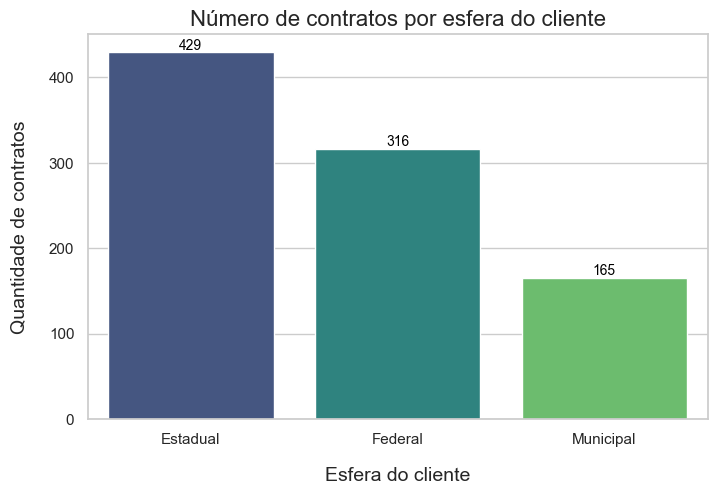

In [34]:
plt.figure(figsize=(8,5))
grafico = sns.barplot(x = contratos_por_esfera.index, y = contratos_por_esfera.values, palette = "viridis")

for p in grafico.patches:
    grafico.annotate(f'{p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     fontsize = 10, color = 'black', 
                     xytext=(0, 5), textcoords = 'offset points')

plt.title("Número de contratos por esfera do cliente", fontsize = 16)
plt.xlabel("Esfera do cliente", labelpad = 15, fontsize = 14)
plt.ylabel("Quantidade de contratos", labelpad = 15, fontsize = 14)
plt.show()

In [38]:
valor_medio_por_esfera = df.groupby("esfera_cliente")["valor_global_contrato_reais"].mean().sort_values(ascending=False)

#print(valor_medio_por_esfera)

### Existe diferença no valor médio dos contratos por esfera?

Aqui estamos analisando o **valor médio** dos contratos realizados por cada esfera de cliente.

O gráfico a seguir exibe o o valor médio dos contratos por **esfera de cliente**.


C:\Users\pedro\AppData\Local\Temp\ipykernel_26236\1097725131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x=valor_medio_por_esfera.index, y=valor_medio_por_esfera.values, palette="magma")


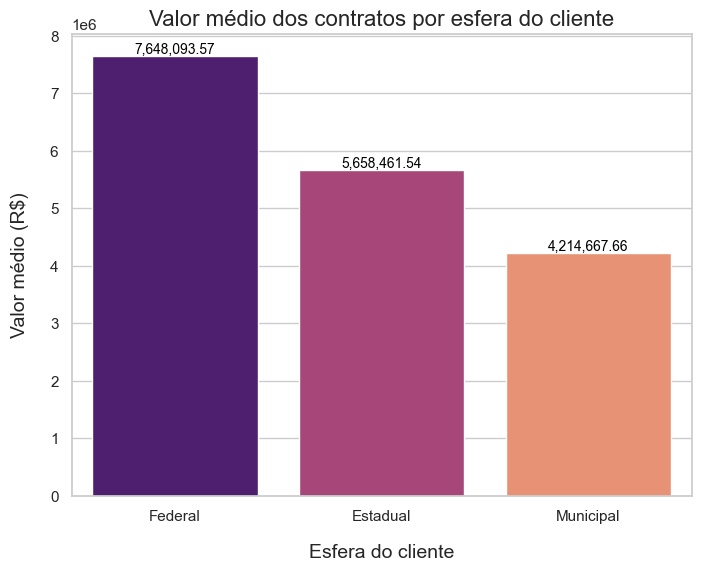

In [43]:
plt.figure(figsize=(8,6))
grafico = sns.barplot(x=valor_medio_por_esfera.index, y=valor_medio_por_esfera.values, palette="magma")

for p in grafico.patches:
    grafico.annotate(f'{p.get_height():,.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     fontsize = 10, color = 'black', 
                     xytext=(0, 5), textcoords = 'offset points')

plt.title("Valor médio dos contratos por esfera do cliente", fontsize=16)
plt.xlabel("Esfera do cliente", labelpad = 15, fontsize = 14)
plt.ylabel("Valor médio (R$)", labelpad = 15, fontsize = 14)
plt.show()